#### Pridicting Heart Disease by using Principal Component Analysis (PCA)

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data
2. Univariate and bivariate analysis 
3. Find the correlation
4. Perform PCA and find the variance from 2 components


To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [4]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [6]:
data = pd.read_csv(r"D:\Desktop\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [11]:
data.duplicated().any()

True

In [12]:
data.shape

(303, 14)

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.shape

(302, 14)

In [17]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [20]:
sns.set_theme(style='whitegrid')

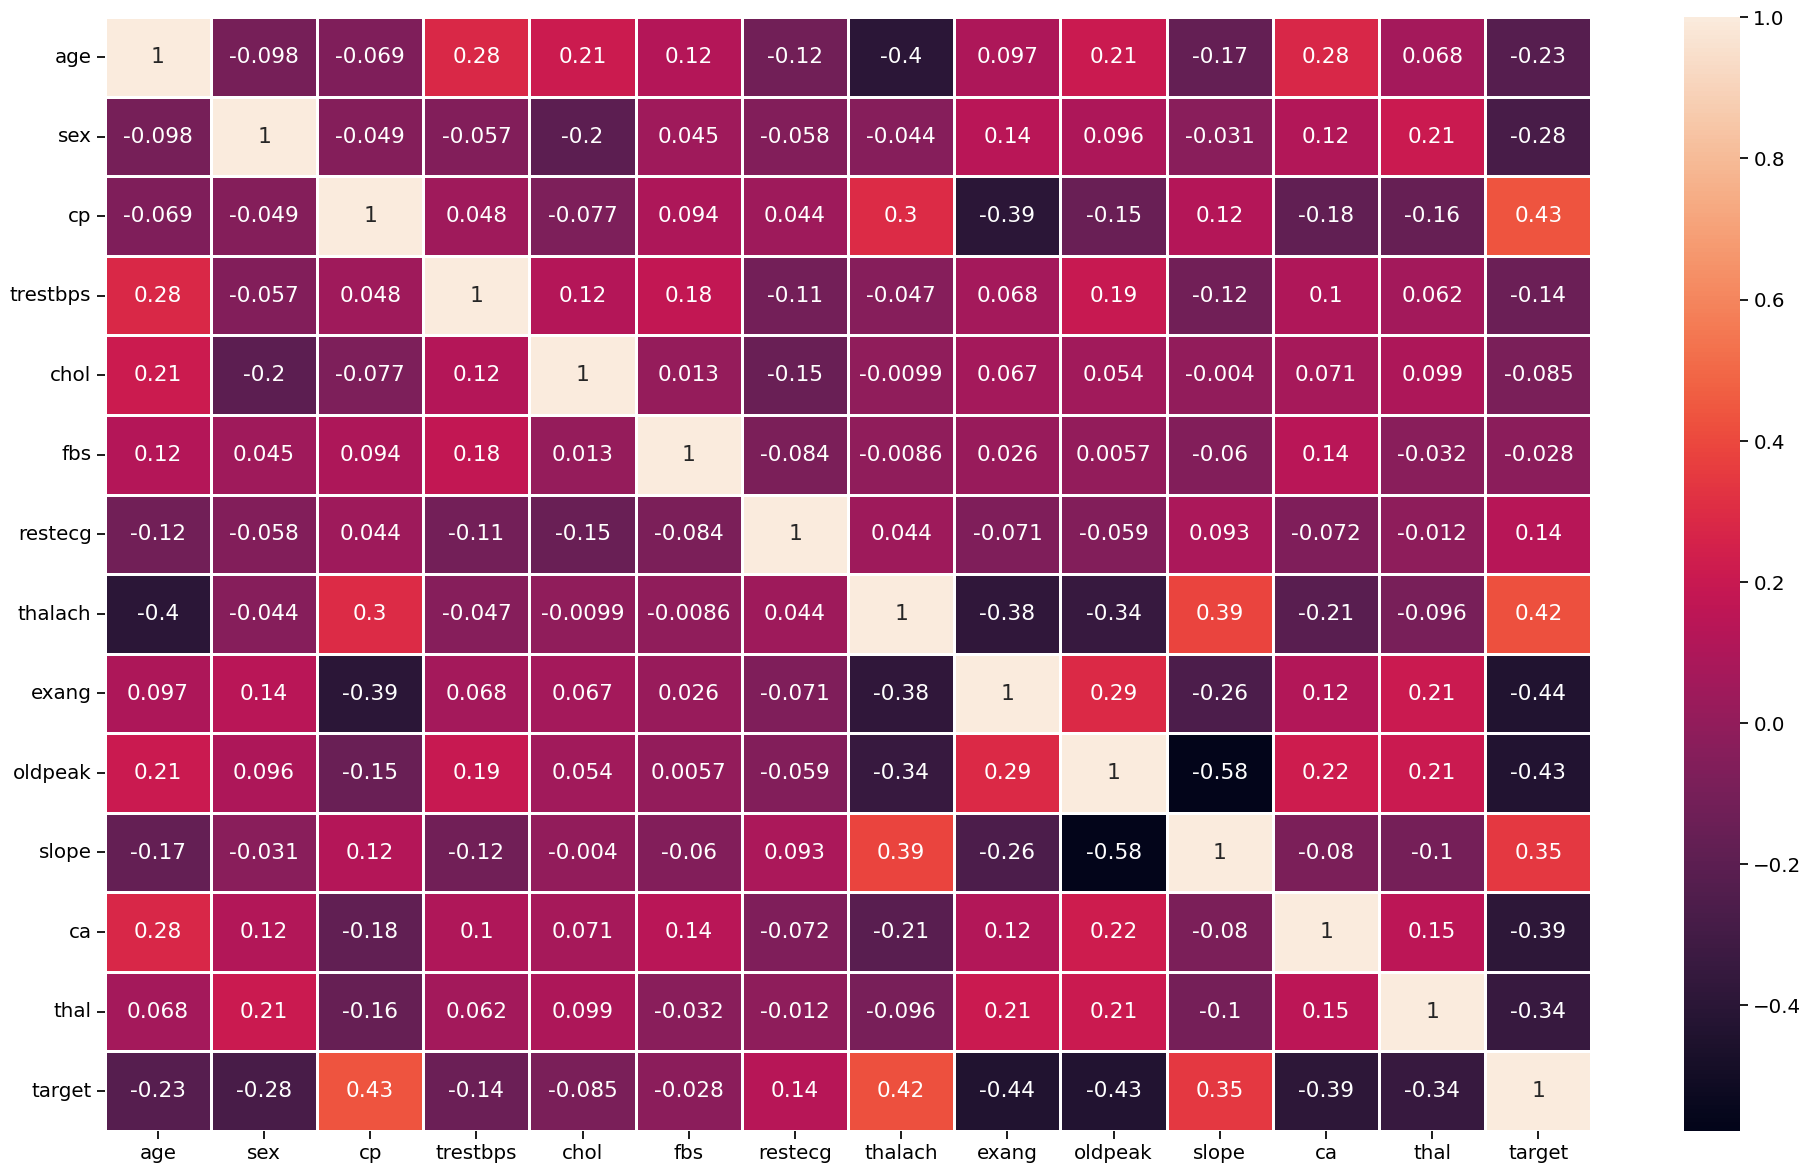

In [9]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,linewidth =2)
plt.tight_layout()

In [26]:
data['target'].groupby(data['sex']).value_counts()[1]

target
0    114
1     92
Name: target, dtype: int64

In [28]:
data['target'].groupby(data['sex']).value_counts()[1][1]/data['target'].groupby(data['sex']).value_counts()[1].sum()*100

44.66019417475729

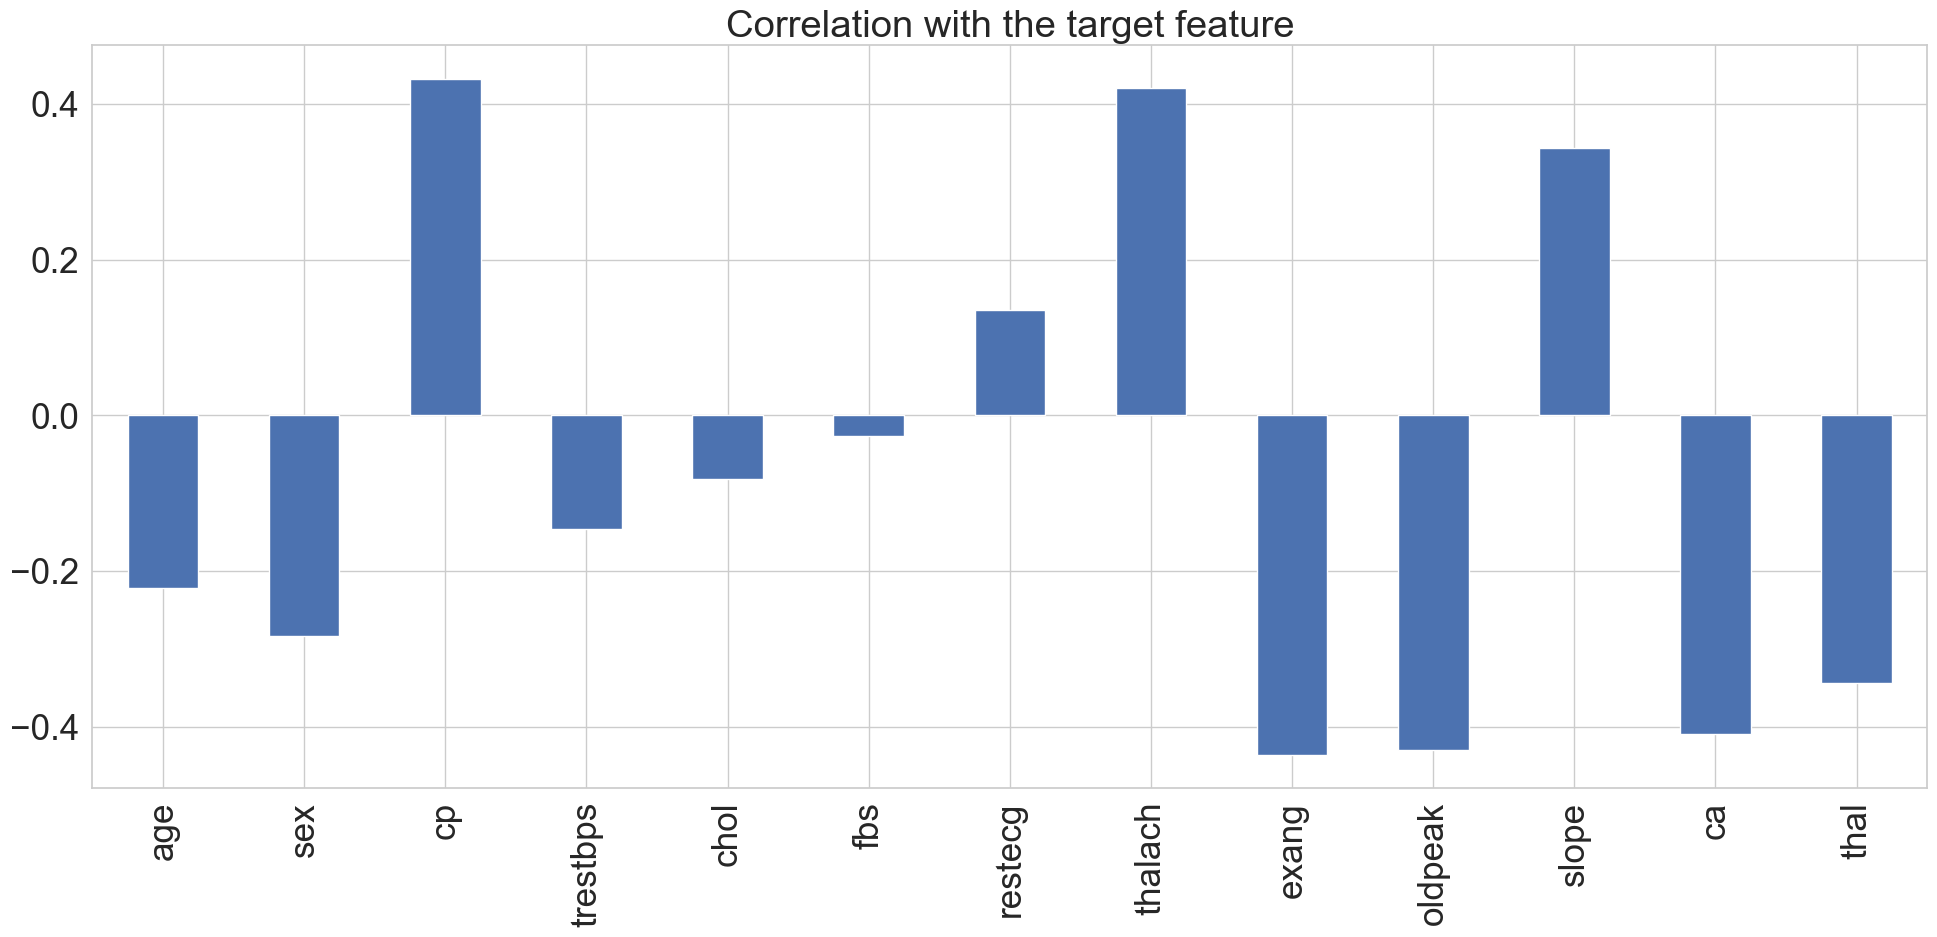

In [33]:
sns.set_context('notebook',font_scale = 2.3)
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

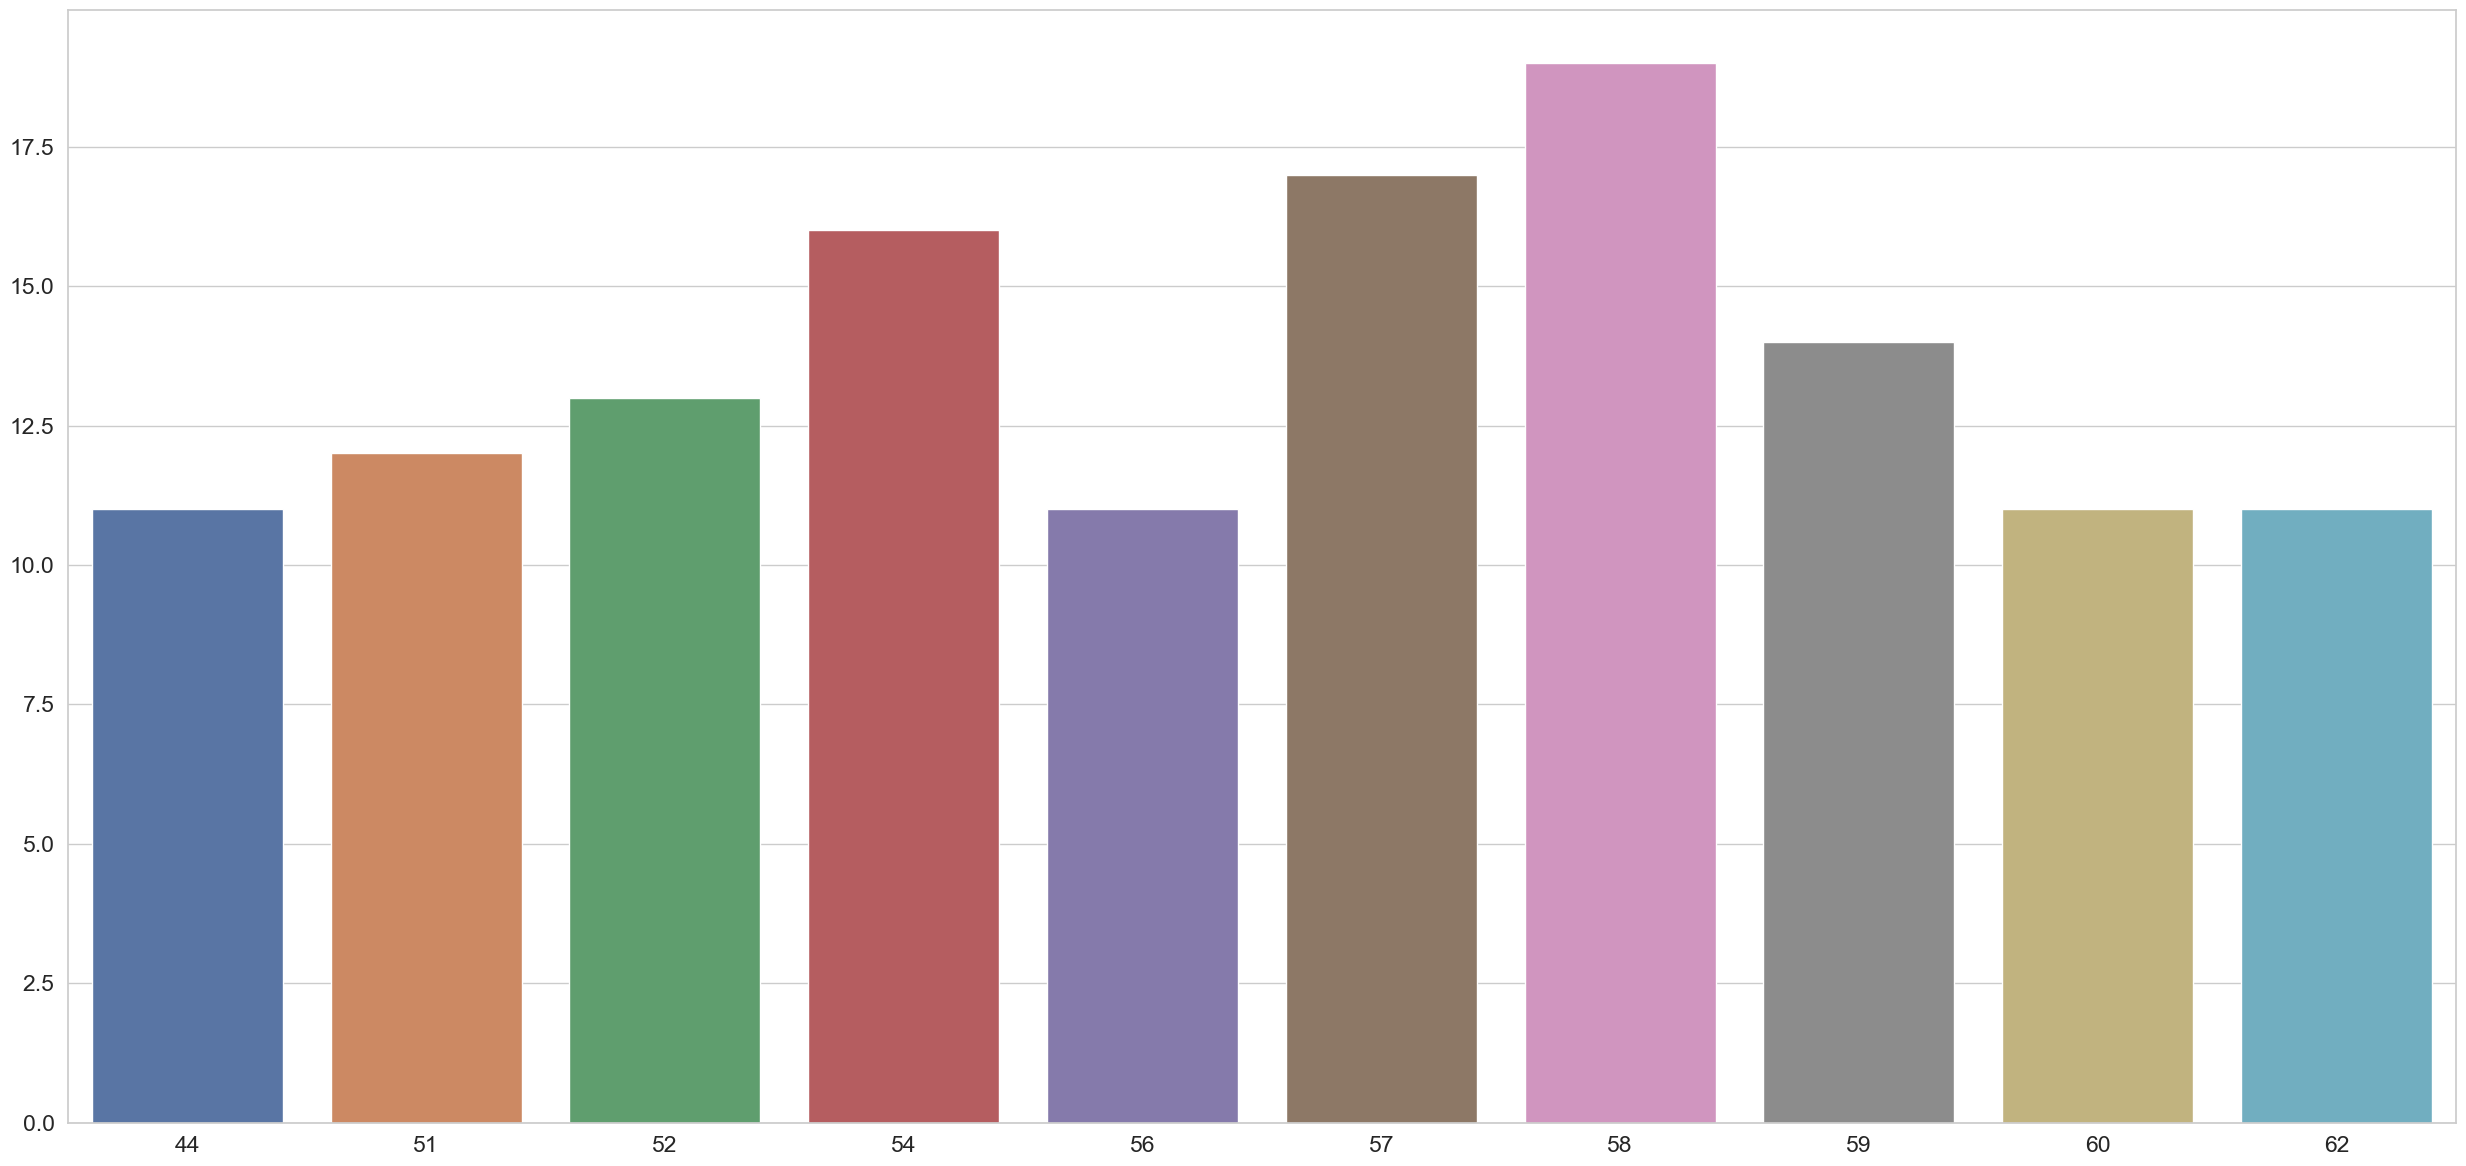

In [34]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data.age.value_counts()[:10].index,y=data.age.value_counts()[:10].values)
plt.tight_layout()

In [35]:
minAge=min(data.age)
maxAge=max(data.age)
meanAge=data.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.420529801324506


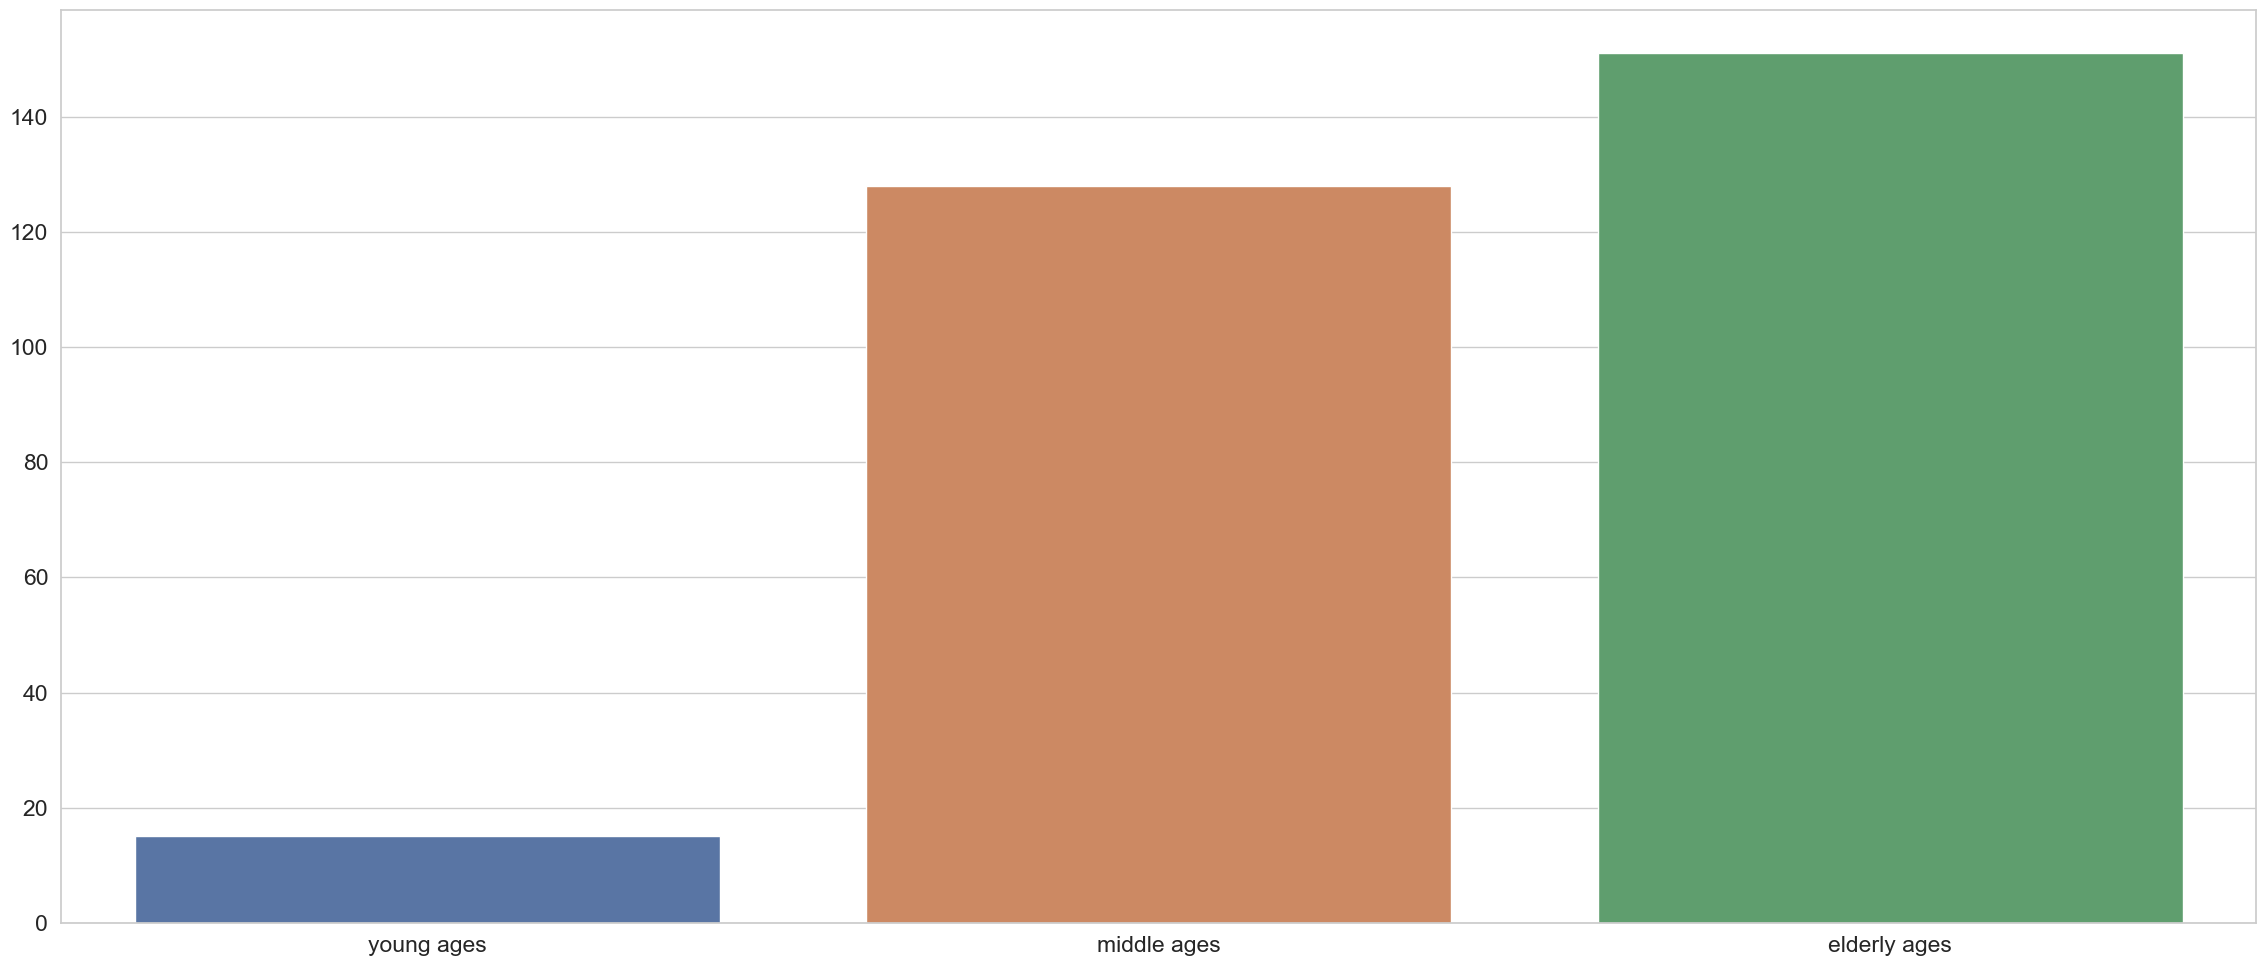

In [36]:
Young = data[(data.age>=29)&(data.age<40)]
Middle = data[(data.age>=40)&(data.age<55)]
Elder = data[(data.age>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

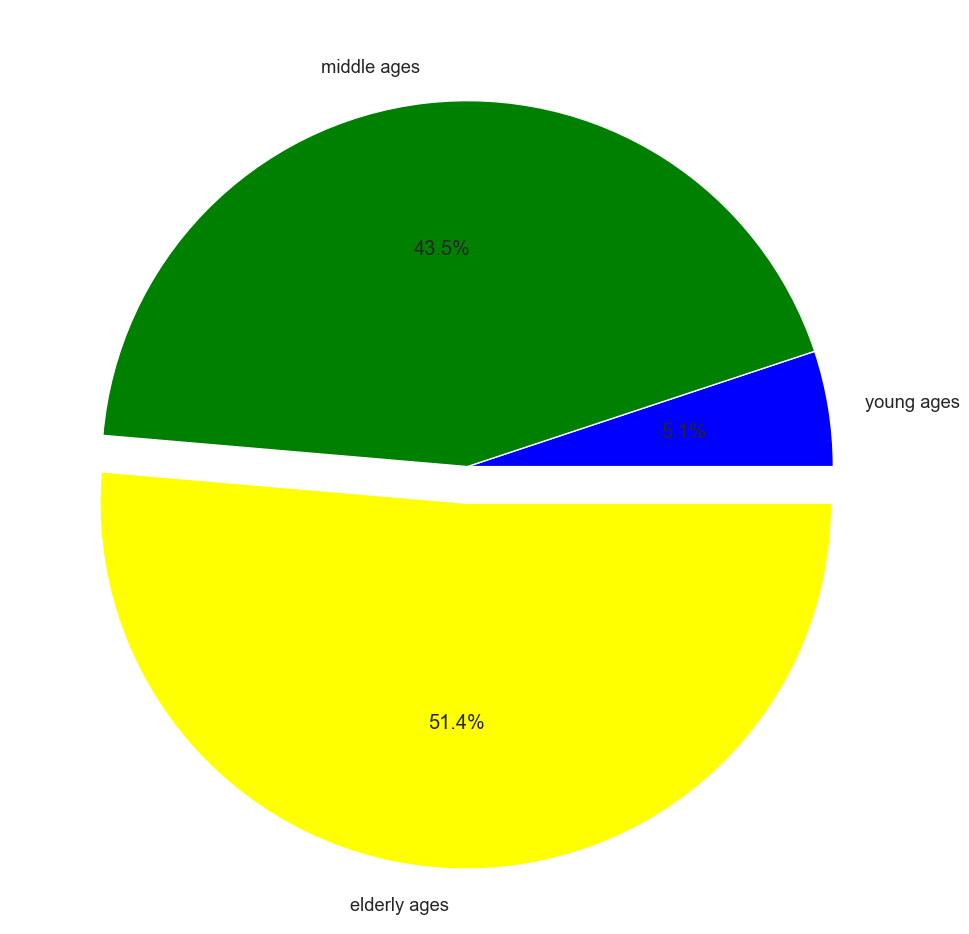

In [37]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

C:\Users\gopat\OneDrive\Documents\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



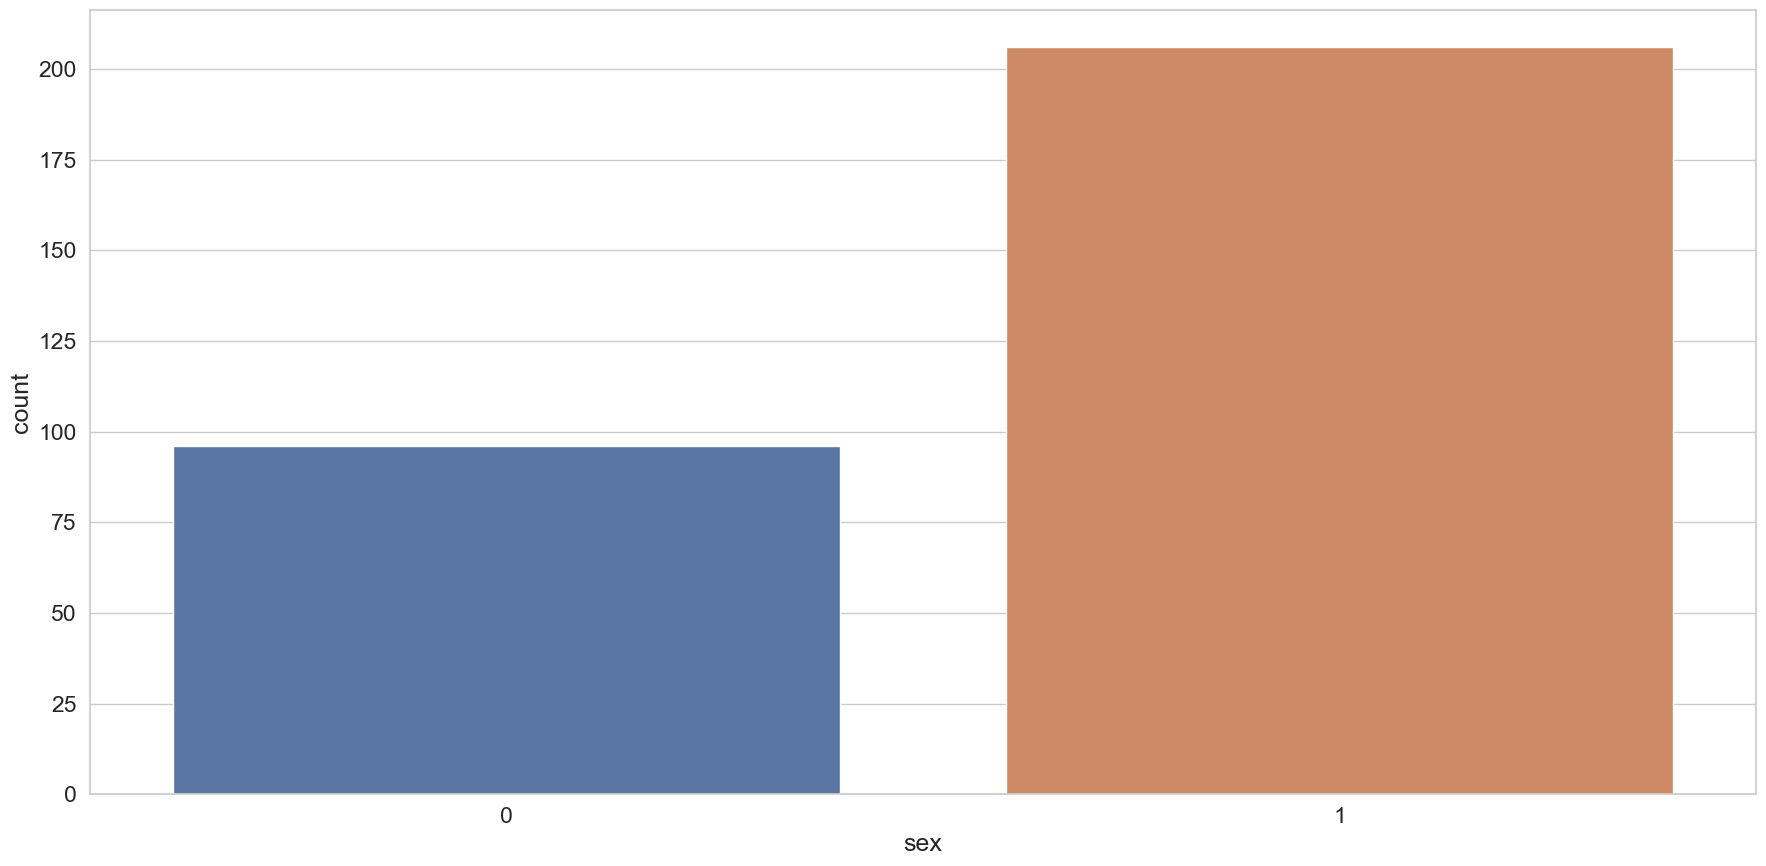

In [38]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['sex'])
plt.tight_layout()

C:\Users\gopat\OneDrive\Documents\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



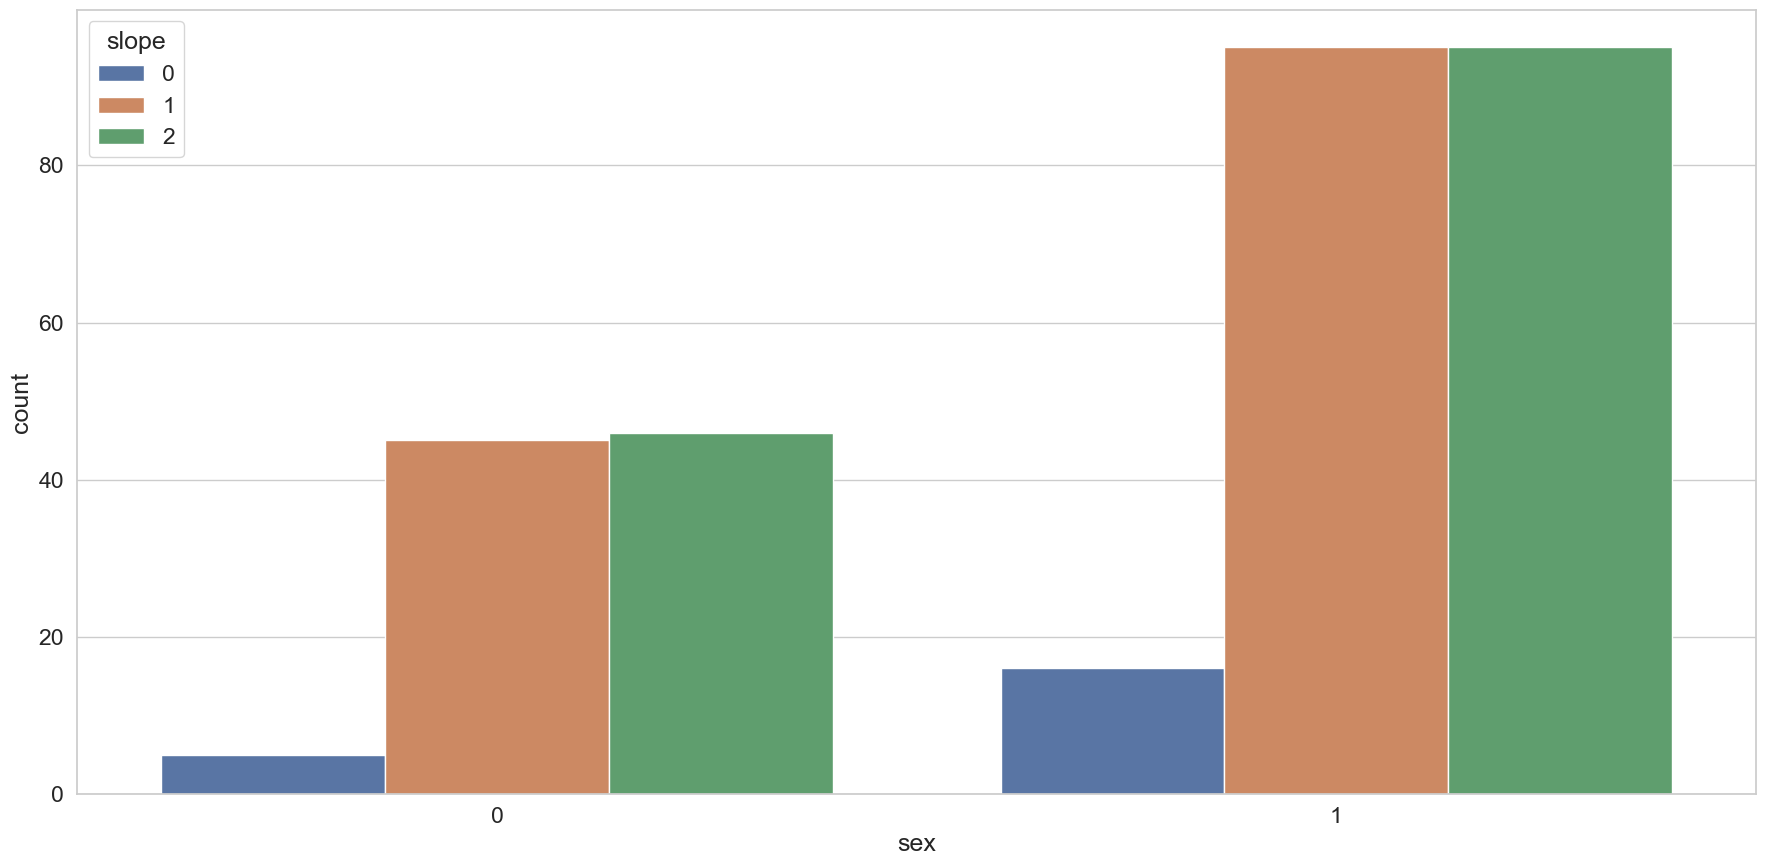

In [39]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['sex'],hue=data["slope"])
plt.tight_layout()

C:\Users\gopat\OneDrive\Documents\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



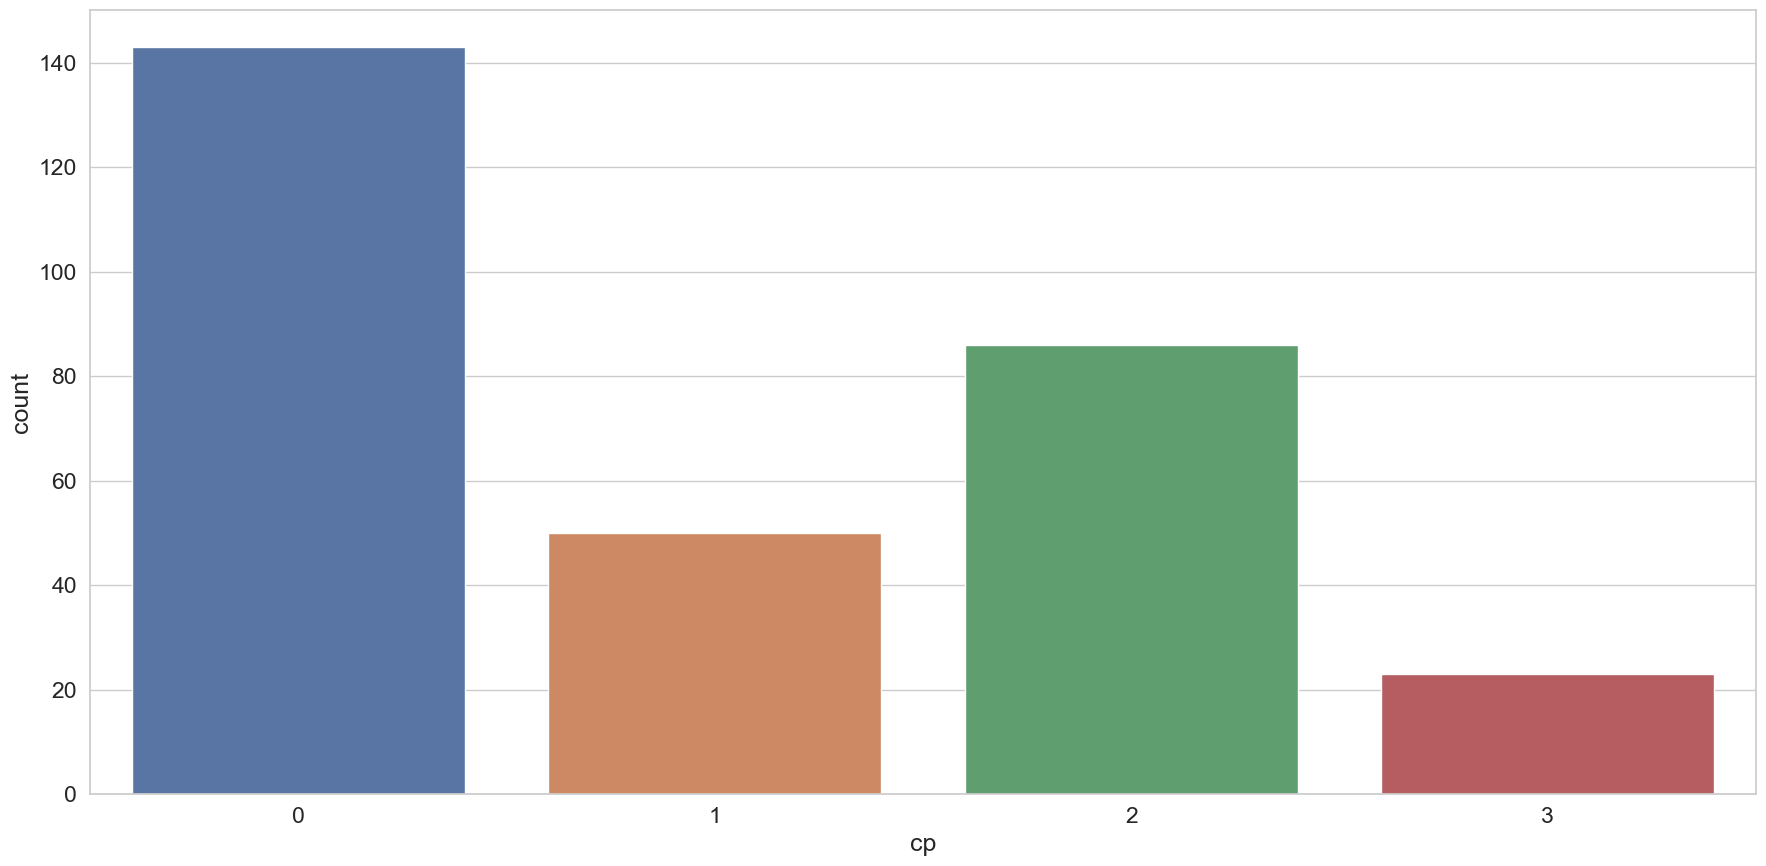

In [40]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['cp'])
plt.tight_layout()

C:\Users\gopat\OneDrive\Documents\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



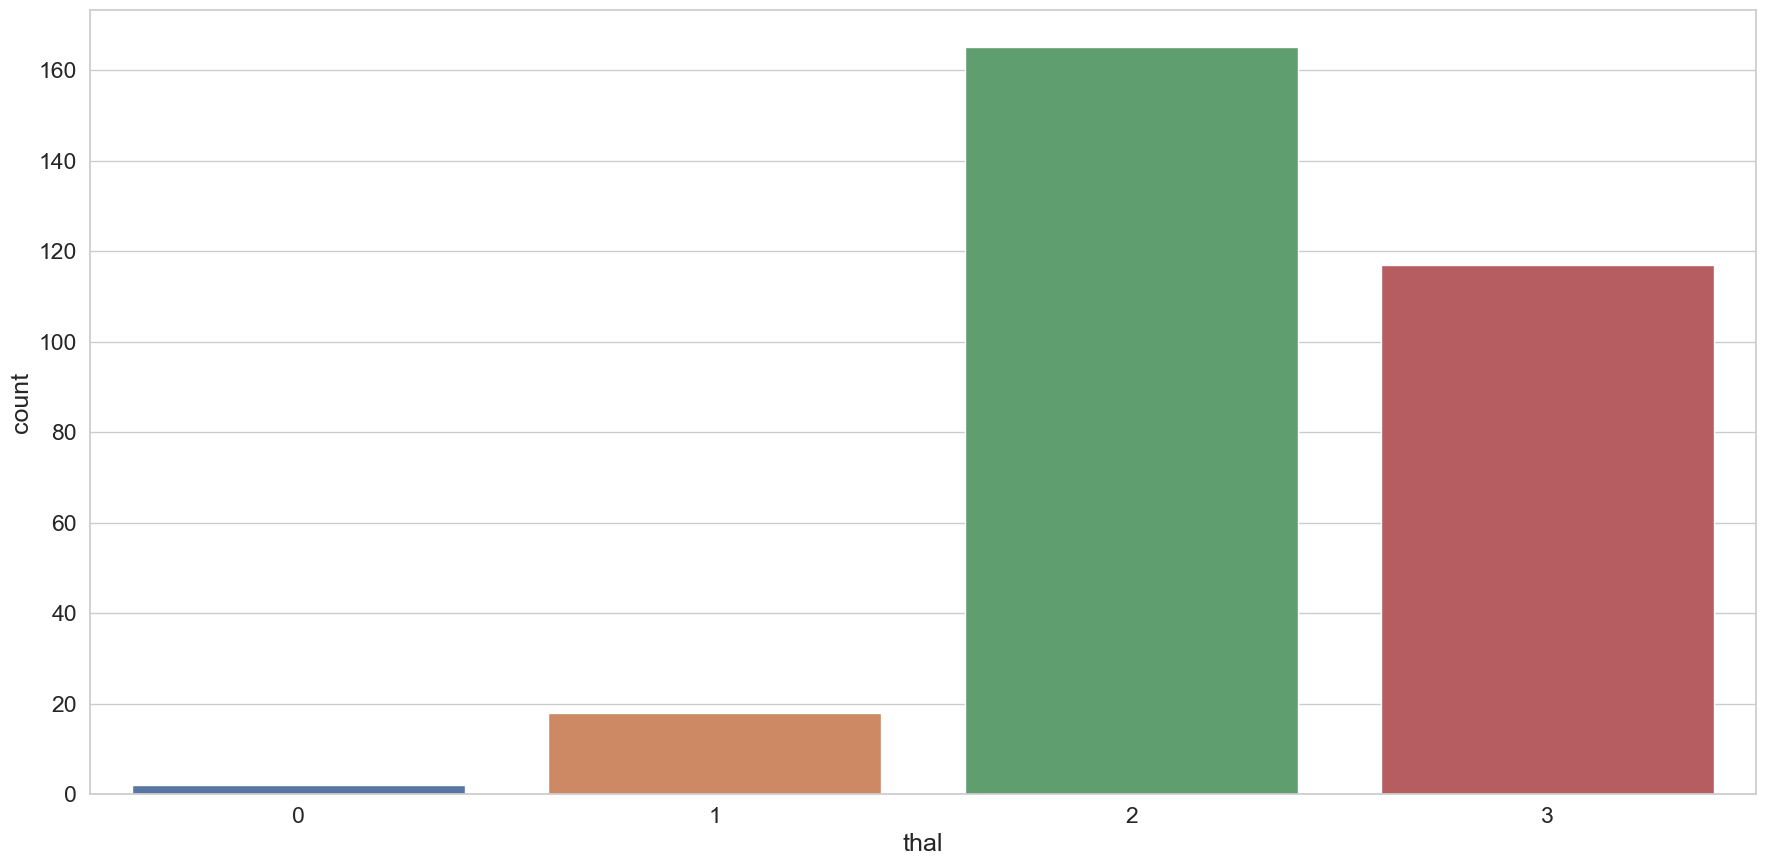

In [41]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['thal'])
plt.tight_layout()

C:\Users\gopat\OneDrive\Documents\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



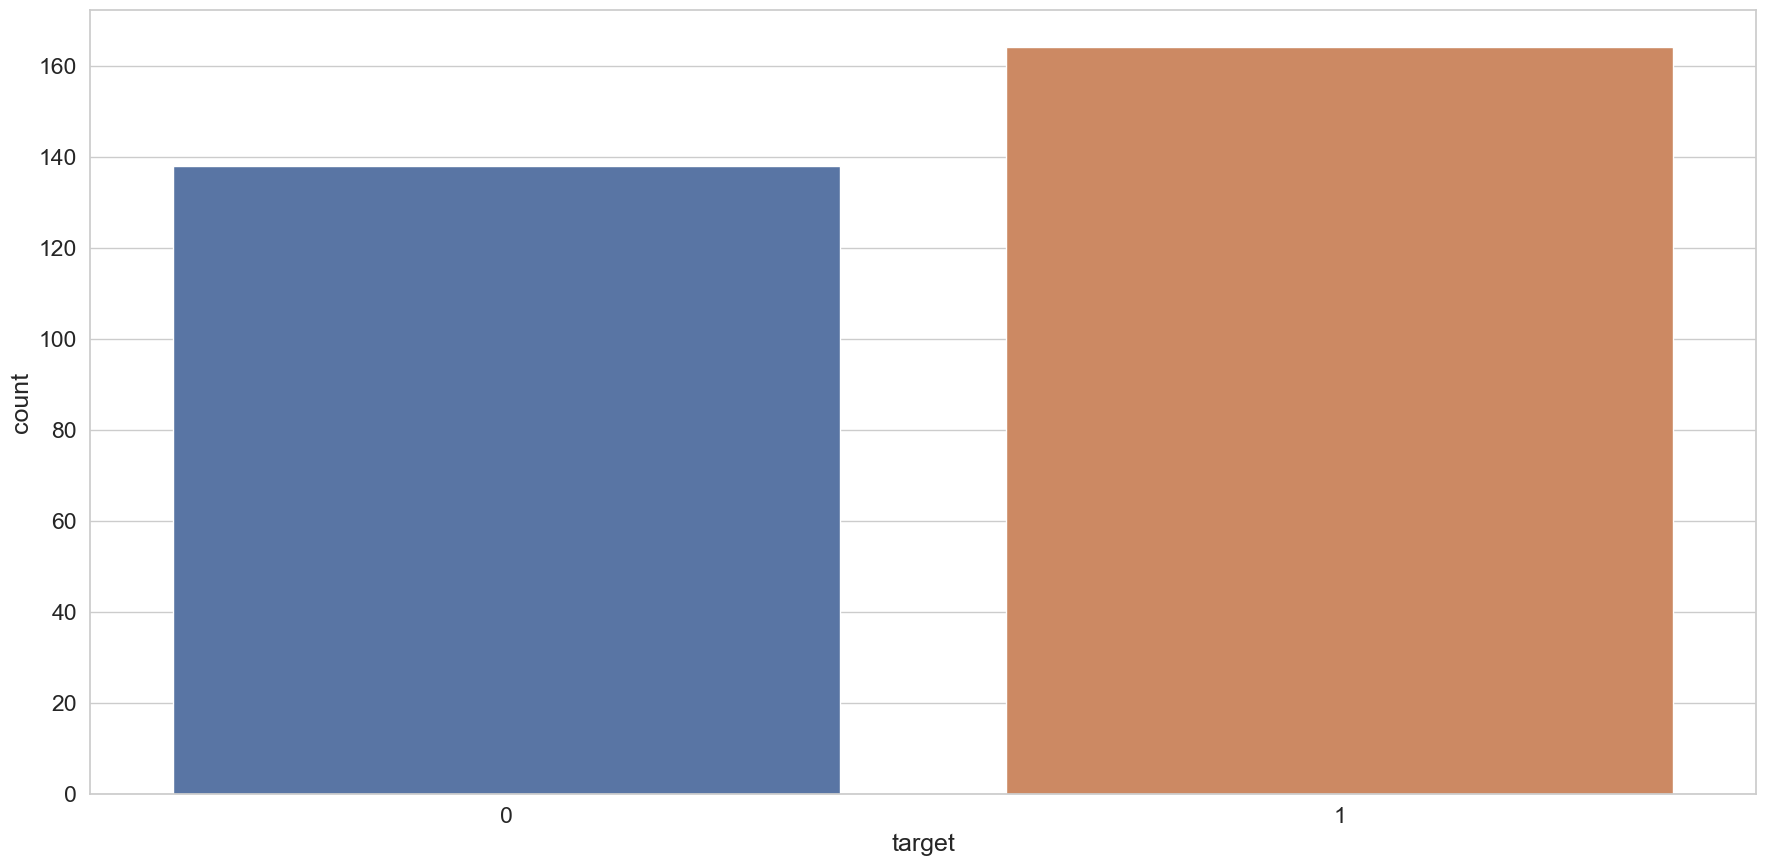

In [42]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['target'])
plt.tight_layout()

In [43]:
categorical_val = []
continous_val = []
for column in data.columns:
    print("--------------------")
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
--------------------
sex : [1 0]
--------------------
cp : [3 2 1 0]
--------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
--------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 34

In [44]:
categorical_val.remove('target')
dfs = pd.get_dummies(data, columns = categorical_val)
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
5,57,140,192,148,0.4,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0


In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dfs[col_to_scale] = sc.fit_transform(dfs[col_to_scale])
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
5,0.285561,0.478910,-1.054817,-0.068642,-0.554576,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0


In [53]:
X = data . iloc[:, 0:12].values
y = data . iloc[:, 12].values
y

array([1, 2, 2, 2, 2, 1, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 2,
       2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2,
       2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 1, 3, 2, 3, 3, 3, 3,
       2, 3, 1, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3,
       1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 1,
       3, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2,
       2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2, 1, 0, 1, 3, 3, 3, 2,
       2, 3, 3, 3, 1, 1, 3, 1, 3, 2, 1, 3, 3, 3, 3,

In [54]:
from sklearn. model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [55]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

In [57]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression  
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [58]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)


In [59]:
# making confusion matrix between
# test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

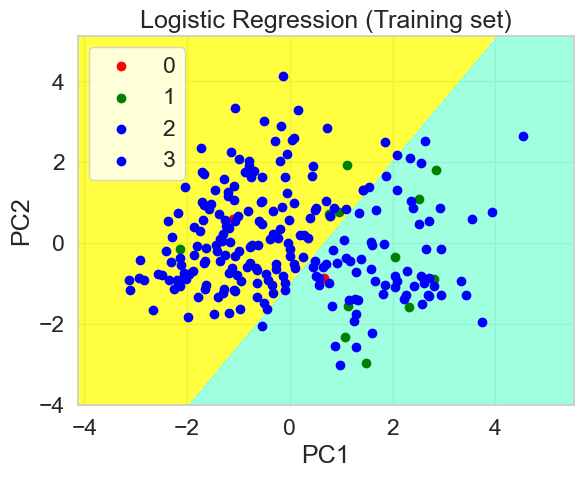

In [60]:
# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                               stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


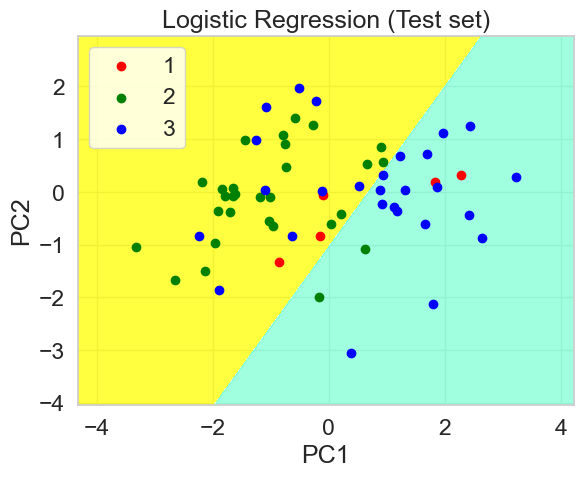

In [61]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
  
X_set, y_set = X_test, y_test
  
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
  
# title for scatter plot
plt.title('Logistic Regression (Test set)') 
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
  
# show scatter plot
plt.show()

<AxesSubplot:>

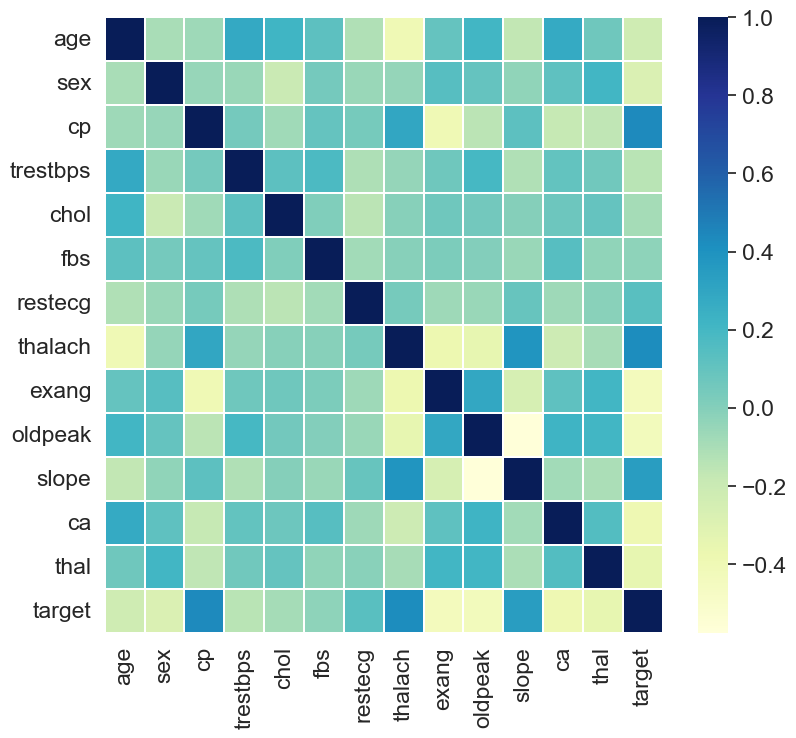

In [76]:
corrmat = data.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

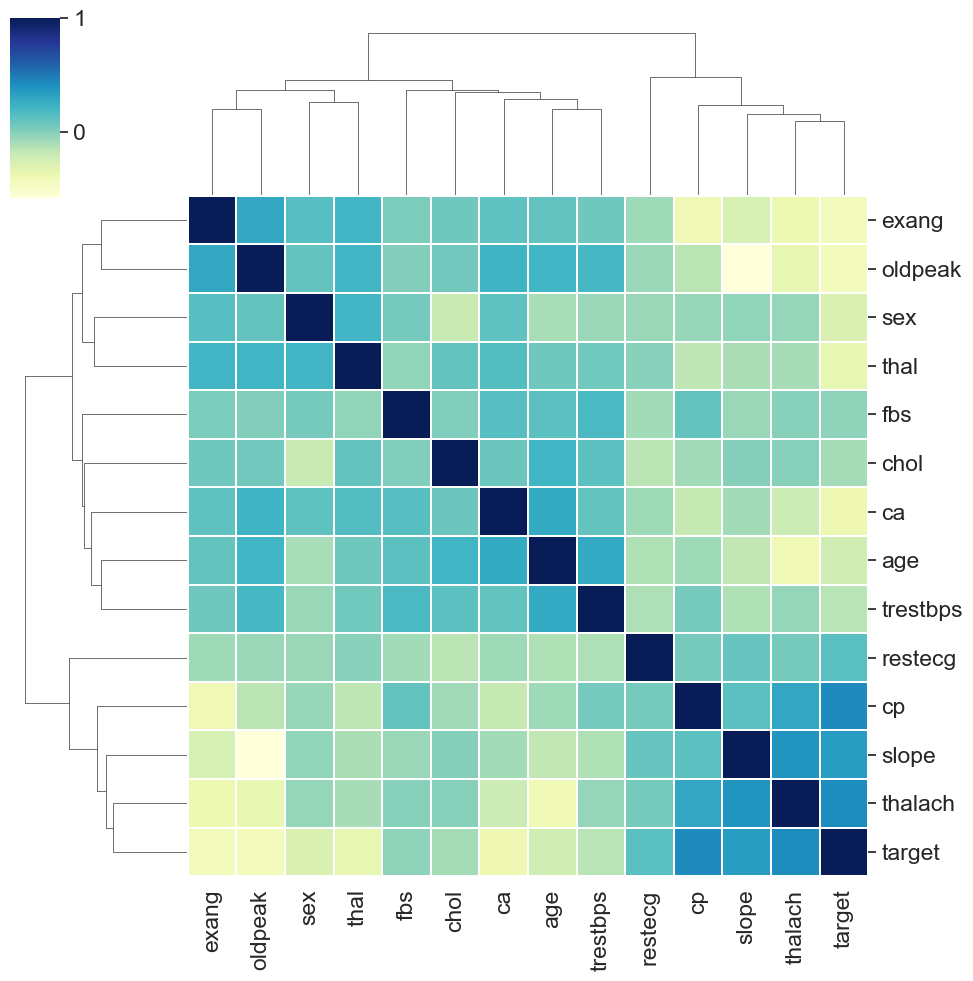

In [77]:
corrmat = data.corr()
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)
  
cg

<AxesSubplot:>

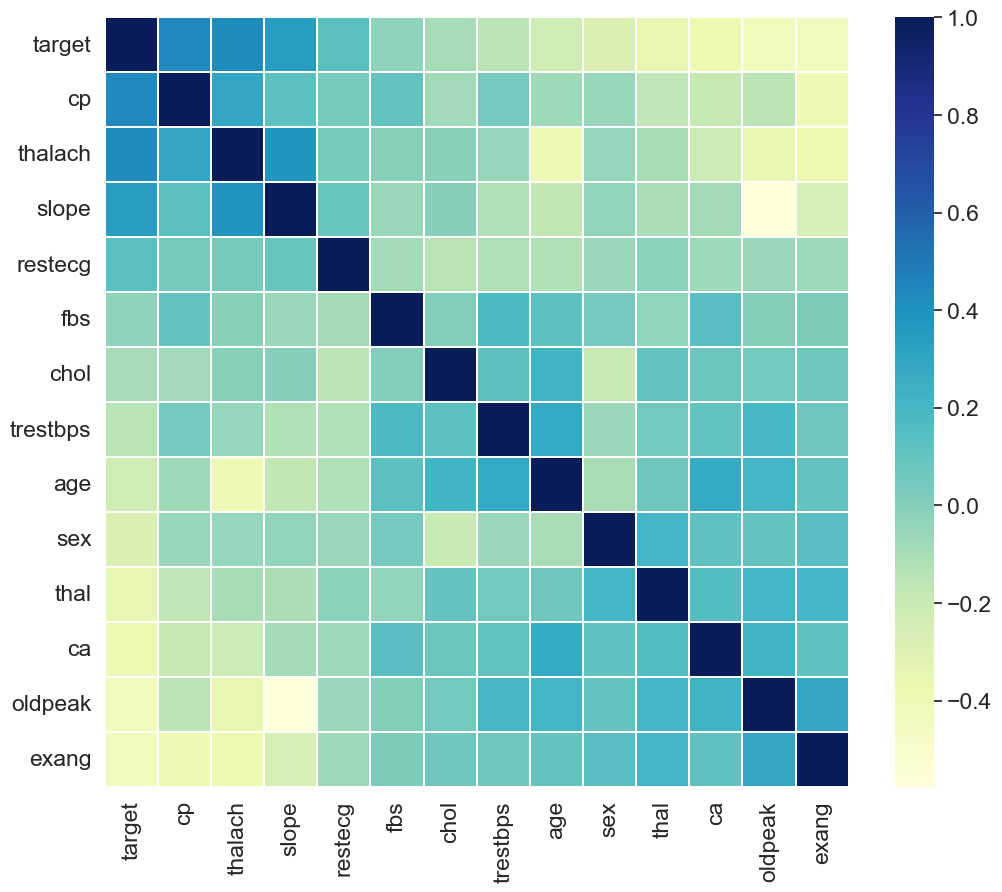

In [79]:
# saleprice correlation matrix
# k : number of variables for heatmap
k = 15 
  
cols = corrmat.nlargest(k, 'target')['target'].index
  
cm = np.corrcoef(data[cols].values.T)
f, ax = plt.subplots(figsize =(12, 10))
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu",
            linewidths = 0.1, yticklabels = cols.values, 
                              xticklabels = cols.values)